In [1]:
#Importing some Important Keras modules or libraries
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [0]:
#Loading Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [0]:
x_train = np.expand_dims(x_train,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)

In [0]:
#Converting labels into one hot encoded vectors
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [14]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [0]:
#Preprocessing the data 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# **Without Callbacks training**

In [0]:
#CNN model
model = Sequential()
model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(10))   
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [18]:
#training without callbacks
history = model.fit(x_train,y_train,validation_split=0.2 , batch_size=256,epochs=100)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 48us/step - loss: 0.5691 - accuracy: 0.8315 - val_loss: 0.1654 - val_accuracy: 0.9566
Epoch 2/100
48000/48000 [==============================] - 2s 43us/step - loss: 0.2233 - accuracy: 0.9366 - val_loss: 0.1046 - val_accuracy: 0.9720
Epoch 3/100
48000/48000 [==============================] - 2s 42us/step - loss: 0.1611 - accuracy: 0.9549 - val_loss: 0.0887 - val_accuracy: 0.9758
Epoch 4/100
48000/48000 [==============================] - 2s 42us/step - loss: 0.1369 - accuracy: 0.9609 - val_loss: 0.0777 - val_accuracy: 0.9769
Epoch 5/100
48000/48000 [==============================] - 2s 43us/step - loss: 0.1196 - accuracy: 0.9650 - val_loss: 0.0708 - val_accuracy: 0.9793
Epoch 6/100
48000/48000 [==============================] - 2s 43us/step - loss: 0.1109 - accuracy: 0.9676 - val_loss: 0.0671 - val_accuracy: 0.9810
Epoch 7/100
48000/48000 [==============================] - 2s 

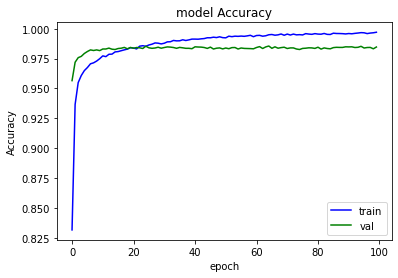

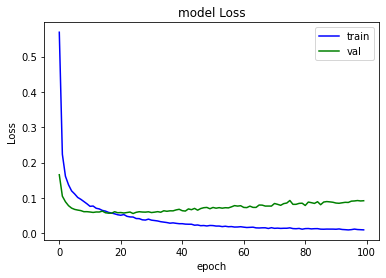

In [29]:
#this function will plot accuracy and loss curve
import matplotlib.pyplot as plt

def plot_curve(train,val,string1,location):
  plt.plot(train,'b-')
  plt.plot(val,'g-')
  plt.title('model '+string1)
  plt.ylabel(string1)
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc=location)
  plt.show()

'upper left'
plot_curve(history.history['accuracy'],history.history['val_accuracy'],'Accuracy','lower right')
plot_curve(history.history['loss'],history.history['val_loss'],'Loss','upper right')

# **Training with callbacks**

In [0]:
#CNN model
model = Sequential()
model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(10))   
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
#Training with callbacks
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=7,monitor='val_loss'),
    keras.callbacks.ModelCheckpoint(filepath='best_model.h5', save_best_only=True),
]

#training
history = model.fit(x_train,y_train,validation_split=0.2 , batch_size=256,epochs=100,callbacks=my_callbacks)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 8s 163us/step - loss: 0.5778 - accuracy: 0.8281 - val_loss: 0.1904 - val_accuracy: 0.9464
Epoch 2/100
48000/48000 [==============================] - 1s 31us/step - loss: 0.2366 - accuracy: 0.9325 - val_loss: 0.1137 - val_accuracy: 0.9682
Epoch 3/100
48000/48000 [==============================] - 1s 30us/step - loss: 0.1686 - accuracy: 0.9519 - val_loss: 0.0884 - val_accuracy: 0.9745
Epoch 4/100
48000/48000 [==============================] - 1s 30us/step - loss: 0.1413 - accuracy: 0.9589 - val_loss: 0.0815 - val_accuracy: 0.9771
Epoch 5/100
48000/48000 [==============================] - 1s 30us/step - loss: 0.1230 - accuracy: 0.9642 - val_loss: 0.0727 - val_accuracy: 0.9789
Epoch 6/100
48000/48000 [==============================] - 1s 30us/step - loss: 0.1133 - accuracy: 0.9670 - val_loss: 0.0793 - val_accuracy: 0.9770
Epoch 7/100
48000/48000 [==============================] - 1s

In [0]:
model.load_weights('best_model.h5')

In [21]:
loss,acc = model.evaluate(x_test,y_test)
print("Testing Accuracy: ",round(acc*100,2))
print("Testing Loss: ",round(loss,2))

10000/10000 [==============================] - 1s 69us/step
Testing Accuracy:  98.44
Testing Loss:  0.05


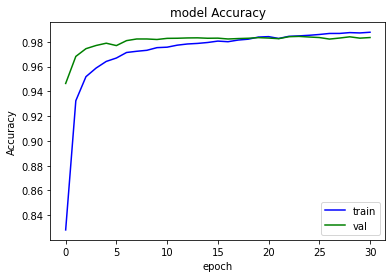

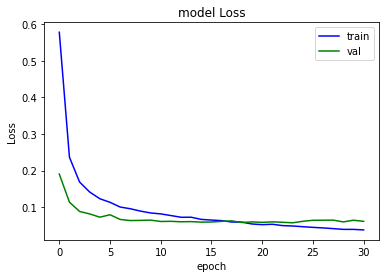

In [19]:
#this function will plot accuracy and loss curve
import matplotlib.pyplot as plt

def plot_curve(train,val,string1,location):
  plt.plot(train,'b-')
  plt.plot(val,'g-')
  plt.title('model '+string1)
  plt.ylabel(string1)
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc=location)
  plt.show()

'upper left'
plot_curve(history.history['accuracy'],history.history['val_accuracy'],'Accuracy','lower right')
plot_curve(history.history['loss'],history.history['val_loss'],'Loss','upper right')